## About Dataset

Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.
The truth is that around the world, thousands of people consume the drink regularly and also in different situations. But have you ever stopped to think about which countries are the most consuming beer in the world? The first one that came to your head was Germany? Well, know that it is not so.
The answer to that question is resounding: the Czech Republic. According to research by the Japanese beverage company Kirin, the country has topped the per capita beer drinking table for 23 consecutive years.
In 2015, the most recent year for which statistics are available, the Czechs drank 142.4 litres per person. That’s the equivalent of 250 pints — or one every 35 hours. But, given that minors are unlikely to be contributing to that figure, it’s safe to assume that the average beer drinker probably guzzles quite a bit more.
Snapping at the Czech Republic’s heels are the usual pretenders. Austria and Germany come third and fourth, Poland sixth and Ireland seventh.There are some surprises, however. In second place is the Seychelles, a lofty ranking which we’ll put down to the hot climate and the large number of holidaymakers.

The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year.

## Data reading

In [112]:
# import libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [113]:
# configure plots style on notebook.

sns.set_palette("Accent")
sns.set_style("darkgrid")

In [114]:
# import data

df = pd.read_csv("Dados/Consumo_cerveja.csv", sep=";")

In [115]:
# show dataset

df.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [116]:
# show dataset size

df.shape

(365, 7)

In [117]:
# Change the name of the columns.

df.columns = ['Date', 'Temp_med', 'Temp_min', 'Temp_max', 'Precipitation', 'Weekend', 'Consumption']

## Descriptive Statistics

In [118]:
df.describe()

,Temp_med,Temp_min,Temp_max,Precipitation,Weekend,Consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


## Correlation Matrix

<AxesSubplot:>

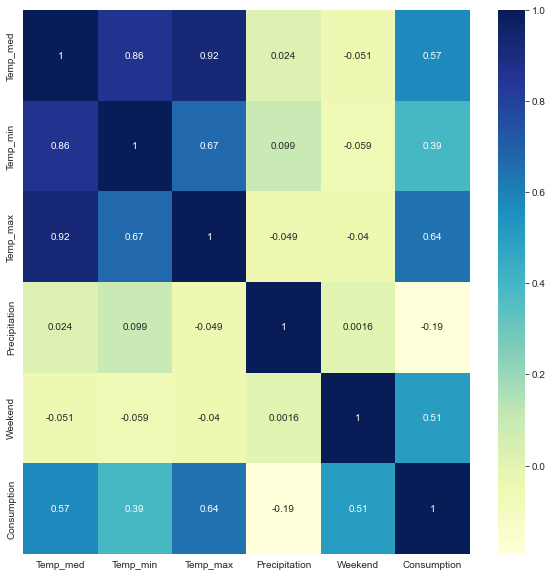

In [119]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(4), annot=True, cmap="YlGnBu")

### Conclusion

We will see that the correlation between consumption and the average temperature is 0.5746, while for minimum temperature we will have 0.3925. At maximum temperature, we have a high correlation of 0.6427. These values reveal that the variable has a good linear relationship with consumption.
When we look at the rain variable, we have a negative value -0.1938. What can we interpret from this data?
When it rains, beer consumption tends to decrease, hence the negative value.
In the case of weekends, we see that consumption rises.
In a linear regression process, we will have a dependent variable (Y), and the auxiliary variables that will explain this consumption (X). In the case just analyzed, the variables "Temp_max" and
"Precipitation" can be classified as X. One reason we don't put the other variables on the X-axis is that, when looking at the average temperature and the minimum temperature, we have a very high variation between the two, and that's not good for the model.

## Graphic Analysis

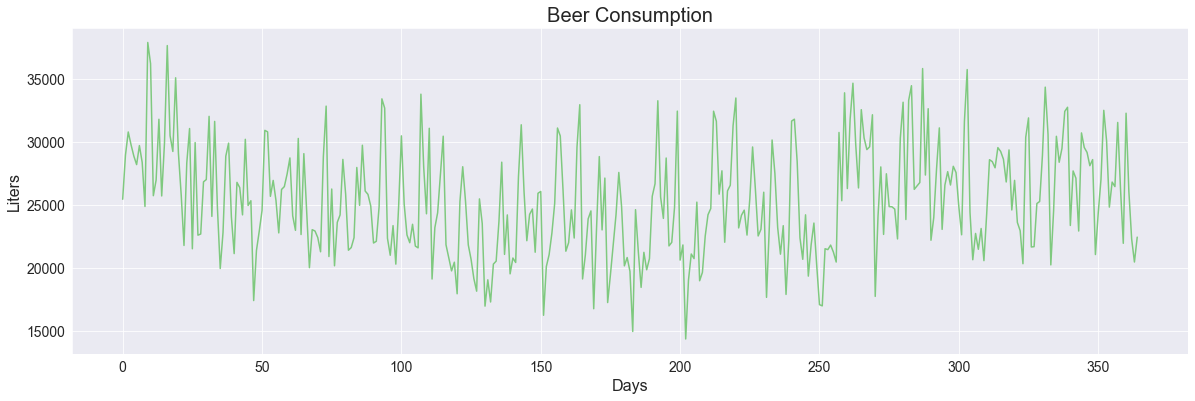

In [120]:
# let's see dependent variable

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title("Beer Consumption", fontdict={"fontsize": 20})
ax.set_ylabel("Liters", fontdict={"fontsize": 16})
ax.set_xlabel("Days", fontdict={"fontsize": 16})

ax = df["Consumption"].plot(fontsize=14)

<AxesSubplot:title={'center':'Beer Consumption'}, xlabel='Liters'>

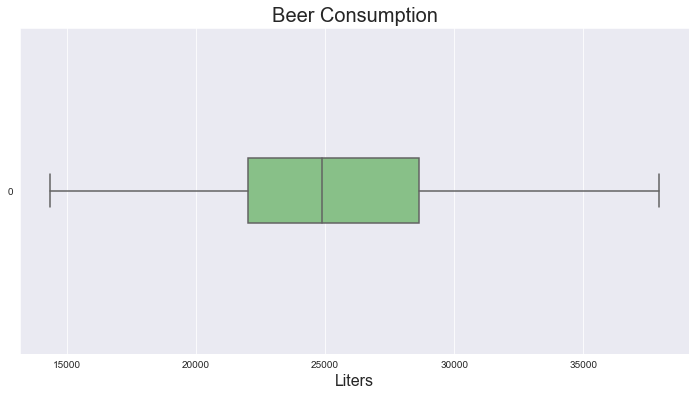

In [121]:
# boxplot of dependency variable

ax = sns.boxplot(data=df["Consumption"], orient="h", width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title("Beer Consumption", fontdict={"fontsize": 20})
ax.set_xlabel("Liters", fontdict={"fontsize": 16})
ax

Text(0.5, 0, 'Weekend')

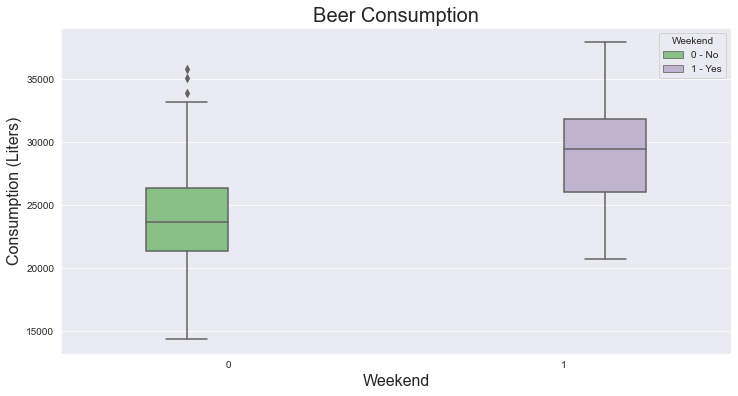

In [122]:
# Investigating the dependent variable (y = Consumption) according to a certain characteristic

ax = sns.boxplot(y="Consumption", x="Weekend", data=df, orient="v", width=0.5, hue="Weekend")
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["0 - No", "1 - Yes"], title="Weekend")
ax.figure.set_size_inches(12, 6)
ax.set_title("Beer Consumption", fontdict={"fontsize": 20})
ax.set_ylabel("Consumption (Liters)", fontdict={"fontsize": 16})
ax.set_xlabel("Weekend", fontdict={"fontsize": 16})

### Brief

We can see that the consumption fall when don't be a weekend.
They can happen variations if we're dealing with holidays.

## Frequency distribution

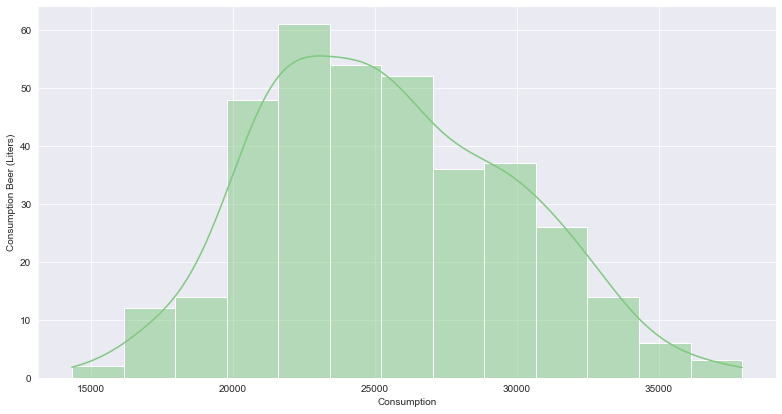

In [123]:
# Frequency distribuition to dependent variable (y).

ax = sns.displot(df["Consumption"], kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_axis_labels("Consumption", "Consumption Beer (Liters)")
ax

## Dispersion graph between the dataset variables

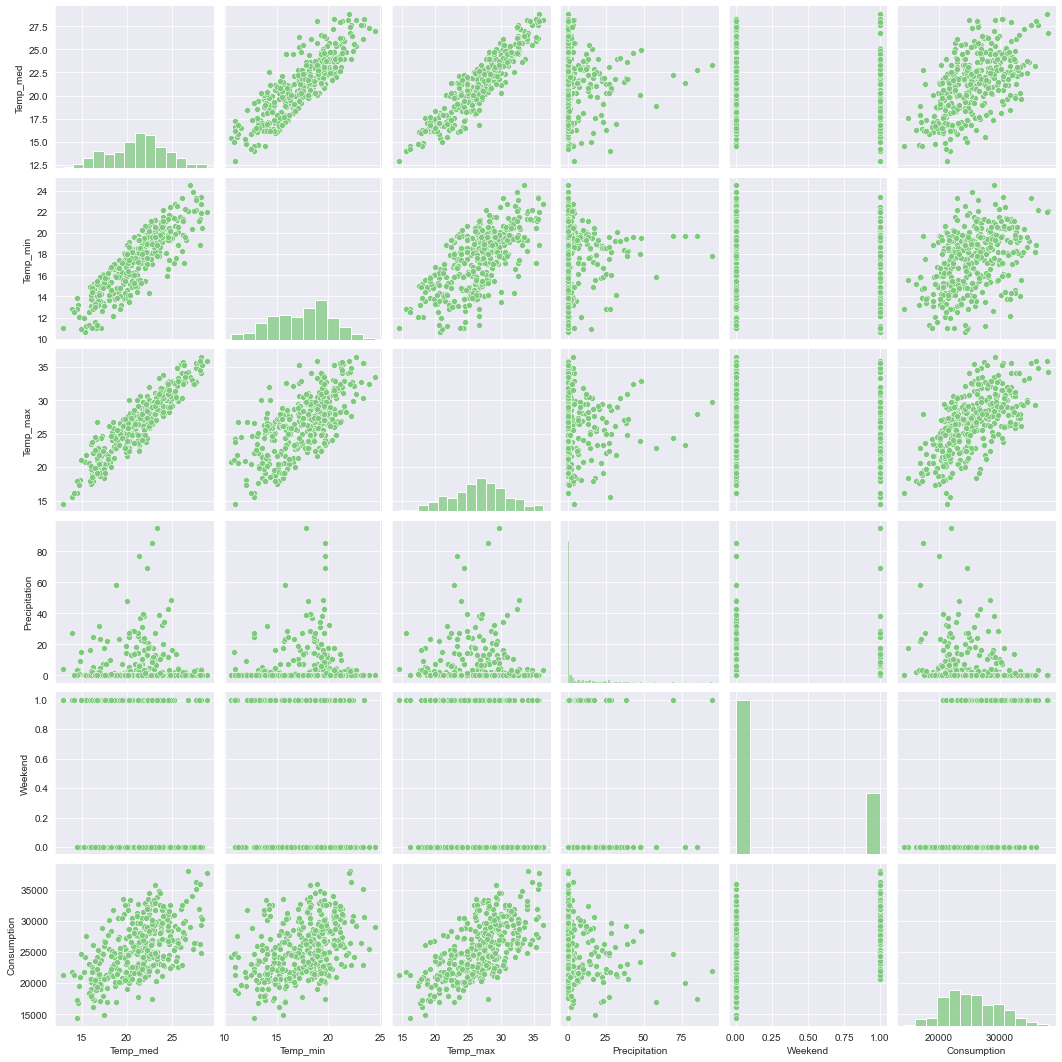

In [124]:
ax = sns.pairplot(data=df)
ax

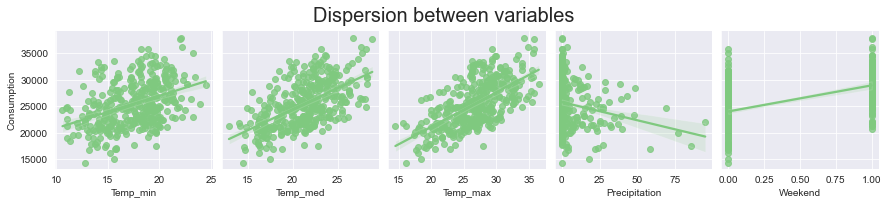

In [125]:
# To see a specific line on pairplot to dependent variable (y == consumo).

ax = sns.pairplot(
    data=df, 
    y_vars=["Consumption"], 
    x_vars=[
        "Temp_min", "Temp_med", "Temp_max", "Precipitation", "Weekend"
    ], 
    kind="reg"
)
ax.fig.suptitle("Dispersion between variables", fontsize=20, y=1.10)
ax

### Brief

As the graph above, we can see that the dependent variable (y == `Consumption`) has a little difference when the temperature is minimum, mean ou maximum, when the temperature is high, the consumption increases. Another case, when we've rain (dispersion between the variable `Precipitation`) the consumption fall. Another case, when the day is a weekend, the consumption increases too.

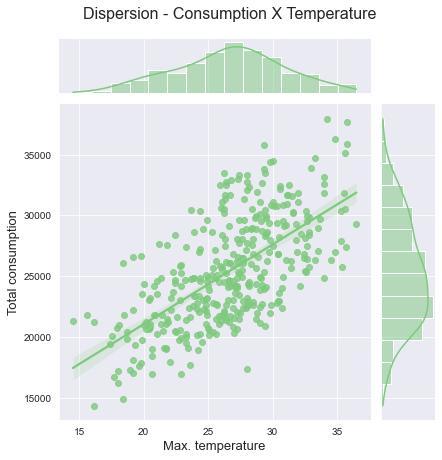

In [126]:
# Plots the relationship between two variables and their respective frequency distributions with the estimated regression line.

ax = sns.jointplot(x="Temp_max", y="Consumption", data=df, kind="reg")
ax.fig.suptitle("Dispersion - Consumption X Temperature", fontsize=16, y=1.05)
ax.set_axis_labels("Max. temperature", "Total consumption", fontsize=13)
ax

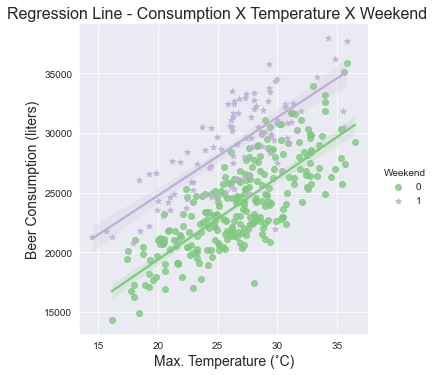

In [127]:
# Plotting an lmplot using a third variable in the analysis

ax = sns.lmplot(x="Temp_max", y="Consumption", data=df, hue="Weekend", markers=["o", "*"], legend=False)
ax.fig.suptitle("Regression Line - Consumption X Temperature X Weekend", fontsize=16, y=1.02)
ax.set_xlabels("Max. Temperature (˚C)", fontsize=14)
ax.set_ylabels("Beer Consumption (liters)", fontsize=14)
ax.add_legend(title="Weekend")
ax

## Estimating a model Linear Regression for the Consumption

In [128]:
# y is our dependent variable.

y = df["Consumption"]

In [129]:
# X is our explanatory variables set.

X = df[["Temp_max", "Precipitation", "Weekend"]]

In [144]:
# Create our train and test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [145]:
X_train.shape

(255, 3)

In [146]:
X_test.shape

(110, 3)

In [147]:
# Instancing LinearRegression model.

model = LinearRegression()

In [148]:
# Fit the linear model.

model.fit(X_train, y_train)

LinearRegression()

In [149]:
# Obtaining the coefficient of determination (R²) of the estimated model with the TRAINING data.

print("R² = {}".format(model.score(X_train, y_train).round(2)))

R² = 0.73


In [150]:
# Making predicts for the test data (X_test).

y_predict = model.predict(X_test)

In [151]:
# Getting the coefficient of determination (R²) for our model predictions.

print("R² = {}".format(metrics.r2_score(y_test, y_predict).round(2)))

R² = 0.69


## Obtain punctual predict

In [152]:
# Entry data

entry = X_test[0:1]

In [153]:
entry

,Temp_max,Precipitation,Weekend
5,30.5,12.2,0


In [154]:
# Generating punctual predict

print(
    "Average beer consumption for one day with punctual input data: {0:.2f} liters.".format(
        model.predict(entry)[0]
    )
)

Average beer consumption for one day with punctual input data: 26094.90 liters.


In [155]:
# Create a simple simulator

temp_max = 40
precipitation = 0 
weekend = 1 # (0 = False; 1 = True)
entry = [[temp_max, precipitation, weekend]]

print("{0:.2f} liters".format(model.predict(entry)[0]))

38742.53 liters


In [156]:
# Create another simulator

temp_max = 19
precipitation = 1
weekend = 0 # (0 = False; 1 = True)
entry = [[temp_max, precipitation, weekend]]

print("{0:.2f} liters".format(model.predict(entry)[0]))

18901.19 liters


### Brief

Based on simulators, we can see that on a very hot day, without rain, and on the weekend, beer consumption increases considerably, but on a colder day, with rain, and on a weekday, consumption is well bass beer.